<a href="https://colab.research.google.com/github/mobinanoorany/computer_vision/blob/main/MNIST_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **image processing and classification with MNIST dataset**
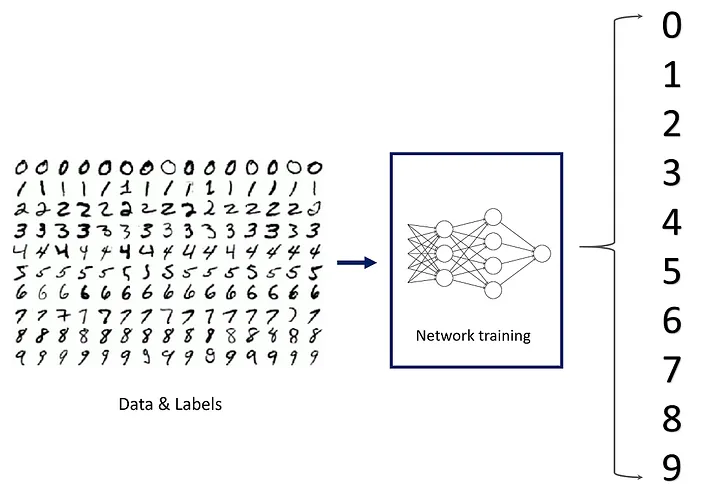

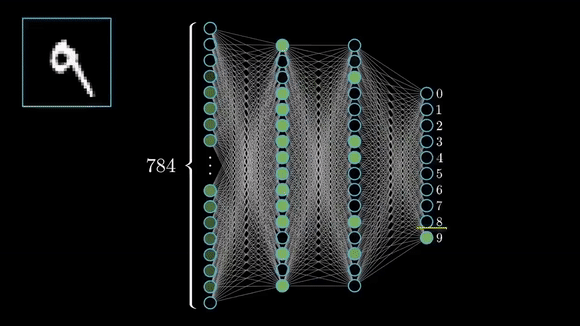

# **Data**
We’re going to use the MNIST dataset in this guide, which is a collection of 70,000 hand-written digit images.
Let’s import our MNIST dataset into train and test sets.

In [1]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


The `load_data()` method of the mnist module returns the train and test sets in form of nested tuples, which we have destructured in the above lines into `X_train`, `X_test`, `y_train`, and `y_test`.

# **Exploring the Data**

Now that we have our data loaded, it’s time to get familiar with it.
Let’s check how many samples do we have in each of train and test sets.



In [2]:
# Check how many examples do we have in our train and test sets
print(f"We have {len(X_train)} images in the training set and {len(X_test)} images in the test set.")


We have 60000 images in the training set and 10000 images in the test set.


Look at that! We’ve got 60,000 training images and 10000 test images! That’s a really good amount of data for our deep learning model.

Now let’s have a look at the shape of our samples.

In [3]:
X_train[0].shape

(28, 28)

# **Visualizing the Images**
Let’s plot the first image in our dataset and see how it looks:



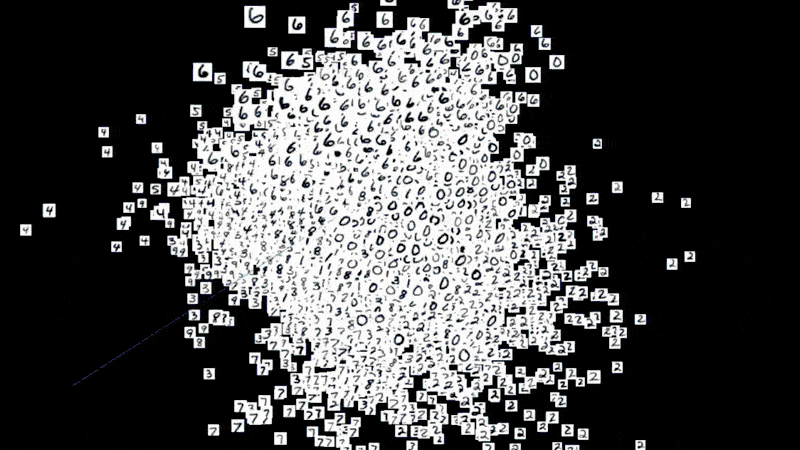

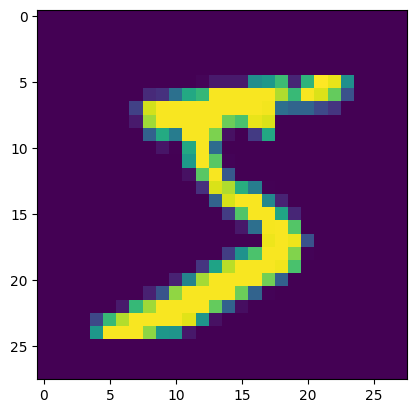

In [4]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

Do we need the axes here? Definitely no. Let’s make our plot a little nicer.

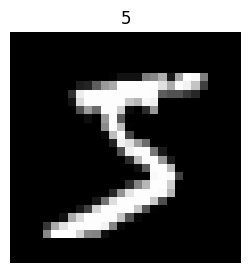

In [5]:
plt.figure(figsize=(3, 3))
plt.imshow(X_train[0], cmap="gray")
plt.title(y_train[0])
plt.axis(False);

This looks a lot better than what he had before.

Up until now, we have visualized only one image, which is not enough, right? Let’s plot a few more randomly picked images.

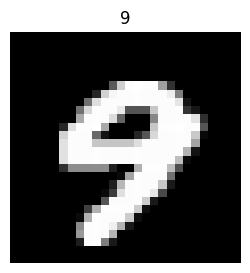

In [8]:
import random
random_image = random.randint(0,  len(X_train))

plt.figure(figsize=(3, 3))
plt.imshow(X_train[random_image], cmap="gray")

plt.title(y_train[random_image])
plt.axis(False);

You’ll see a random image each time you run this code cell. Run this at least 10 to 20 times so you get more familiar with the images.

# **Preprocessing Our Data**
Now that we’ve visualized enough images, it’s time to preprocess our data to be in the right shape for our model.

Let’s check the shape of our images once again.

In [9]:
X_train.shape
# Output: (60000, 28, 28)

(60000, 28, 28)

The output shows that we have 60,000 training images of size 28x28 each.

The Conv2D layer in a convolutional model requires the input to be in shape: `[height, width, color_channels] `but we only have the `height` and `width` dimensions so far. Let's reshape our train and test data to have the missing color_channels dimension as well.

In [10]:
X_train = X_train.reshape(X_train.shape + (1,))
X_test = X_test.reshape(X_test.shape + (1, ))

X_train.shape # (60000, 28, 28, 1)

(60000, 28, 28, 1)

Neural networks tend to like normalized data and perform better on it. Normalization, in simple terms, means to have the data at the same scale, that is, in our case, between 0 and 1. Let’s normalize our train and test images.

In [11]:
X_train = X_train / 255.
X_test = X_test / 255.

We also need to change the datatype of our training and test sets to float32 rather than the default float64.

In [13]:
import numpy as np
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

# **Building our Convolutional Model**

To build our image recognition model, we’ll follow the TinyVGG architecture, as shown in the image below:
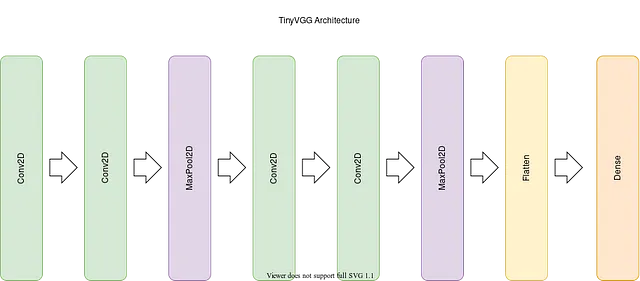




In [14]:
import tensorflow as tf
from tensorflow.keras import layers

model = tf.keras.Sequential([
	layers.Conv2D(filters=10,
				kernel_size=3,
				activation="relu",
				input_shape=(28,  28,  1)),
	layers.Conv2D(10,  3, activation="relu"),
	layers.MaxPool2D(),
	layers.Conv2D(10,  3, activation="relu"),
	layers.Conv2D(10,  3, activation="relu"),
	layers.MaxPool2D(),
	layers.Flatten(),
	layers.Dense(10, activation="softmax")
])

1.   The `Conv2Dlayer` applies some filters (in our case, 10) to the images. The kernel size (3 in our case) determines the dimensions of the kernel. To know more about filters and kernels, head over to [CNN Explainer](https://poloclub.github.io/cnn-explainer/), an awesome resource to learn about convolution neural networks.
2.   The `MaxPool2D` layer downsamples (i.e. condenses) the input image. Again, [CNN Explainer](https://https://poloclub.github.io/cnn-explainer/) is the best resource to learn about the pooling layer.

3.  The output Dense layer requires its input to be one-dimensional, for which we’ve added a Flatten layer in between the second MaxPool2D layer and the output Dense layer.


Let’s check the summary of our model.

In [15]:

# Check the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 10)        100       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 10)        910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 10)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 10)        910       
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 10)          910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 10)          0         
 g2D)                                                   

# **train our Model**

To compile our model, we’ll use sparse_categorical_crossentropy as our loss function as our labels are label-encoded, and Adam as the optimizer as it works best for almost every problem, and accuracy as our evaluation metric.

In [16]:
model.compile(loss="sparse_categorical_crossentropy",
			optimizer=tf.keras.optimizers.Adam(),
			metrics=["accuracy"])

Finally, it’s time to train our model! Are you excited? I hope yes.
Let’s fit it on the training data over 10 epochs.

In [ ]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 65s 33ms/step - loss: 0.2589 - accuracy: 0.9174
Epoch 2/10
1875/1875 [==============================] - 61s 33ms/step - loss: 0.0867 - accuracy: 0.9734
Epoch 3/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0674 - accuracy: 0.9793
Epoch 4/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0570 - accuracy: 0.9830
Epoch 5/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0495 - accuracy: 0.9845
Epoch 6/10
 938/1875 [==============>...............] - ETA: 24s - loss: 0.0439 - accuracy: 0.9865

Wait until the model trains, then run the following cell to see how well our model performs on test data.

Evaluating model

In [ ]:
model.evaluate(X_test, y_test)

Look at that! Our model has ~99% accuracy on the test data! That’s huge!

As a final step, let’s save our model so that we can use it later in any application.

In [ ]:
model.save("digit-recognizer.h5")

Congratulations on building your first computer vision model, the digit recognizer model.